# Demo for SVM and SVC from Scratch

## Setup Environment

In [1]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from SVM import SVM, SVC

In [2]:
def poly_feats(input_values, degree):
    if degree==1:
        if input_values[0] != 1:
            result = input_values.insert(0,1)
        result=input_values
        return np.array(result)
    elif degree > 1:
        new_result=[]
        result = poly_feats(input_values, degree-1)
        new_result.extend(result)
        for item in input_values:
            for p_item in result:
                res=item*p_item
                if (res not in result) and (res not in new_result):
                    new_result.append(res)
        return np.array(new_result)

## Linear SVM

In [3]:
## Generating a binary data set which can be separated by a hyperplane

# n= the number of data
n=20
# n1 = the size of the first cluster
n1=0
# d = dim
d=2
while n1<n/3 or n1>2*n/3:
    X=np.random.rand(n,d)
    # hyperplane: omega.x + beta =0
    omega = np.random.randn(d)
    beta= np.random.randn(1)[0]
    Y=np.zeros(n) 
    for i in range(n):
        Y[i]=np.dot(X[i],omega)+beta
        Y[i]=Y[i]/abs(Y[i])
    n1=len(X[Y>0])

In [4]:
lsvm = SVM()
lsvm.fit(X, Y)

# report
print()
print(f'Alpha: {lsvm.opt_coef.tolist()}')
print(f'Weight: {lsvm.weight.tolist()}')
print(f'Bias: {lsvm.bias}')

     pcost       dcost       gap    pres   dres
 0: -7.3345e+00 -1.9721e+01  1e+01  3e-15  2e+00
 1: -1.1184e+01 -1.6294e+01  5e+00  2e-15  1e+00
 2: -7.5142e+01 -8.2657e+01  8e+00  2e-14  9e-01
 3: -1.7671e+02 -2.0967e+02  3e+01  4e-14  9e-01
 4: -3.3816e+02 -4.3463e+02  1e+02  6e-14  6e-01
 5: -4.0213e+02 -4.3426e+02  3e+01  6e-14  8e-02
 6: -4.0419e+02 -4.0460e+02  4e-01  1e-13  1e-03
 7: -4.0421e+02 -4.0421e+02  4e-03  6e-14  1e-05
 8: -4.0421e+02 -4.0421e+02  4e-05  8e-14  1e-07
 9: -4.0421e+02 -4.0421e+02  4e-07  1e-13  1e-09
Optimal solution found.

Alpha: [8.03419856348631e-11, 1.9456288192750896e-10, 20.986728796633663, 6.079874503007283e-11, 1.3263589133468315e-10, 3.510718225007286e-11, 5.56069393628682e-11, 3.451926177409684e-10, 3.993203349744138e-11, 1.1488529793882137e-11, 9.515841265603441e-11, 5.472995133141311e-14, 1.0070719083630881e-11, 383.2191284667233, 1.8984279638805713e-10, 7.177080619585108e-14, 5.4124862284544985e-11, 404.20585726251795, 1.6796756502776207e-1

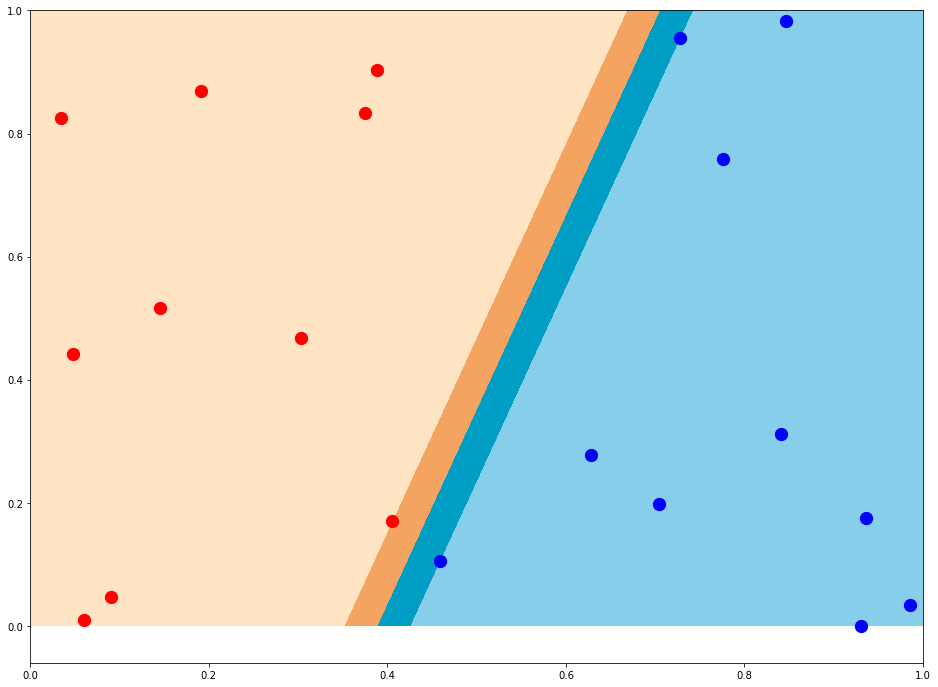

In [5]:
resolution = 50
dx = np.linspace(0, 1, resolution)
dy = np.linspace(0, 1, resolution)
dx, dy = np.meshgrid(dx, dy)
grid_x = np.c_[dx.flatten(), dy.flatten()]
z = np.array([lsvm.hypothesis(x) for x in grid_x])
z = z.reshape(dx.shape)

plt.figure(figsize=(16, 12))
plt.contourf(dx, dy, z, [-10000, -1, 0, 1, 10000], colors=['skyblue', '#009dc4', 'sandybrown', 'bisque'])
plt.scatter(X[Y >= 0, 0], X[Y >= 0, 1], s=150, color='r')
plt.scatter(X[Y < 0, 0], X[Y < 0, 1], s=150, color='b')
plt.show()

## Linear SVM With Polynomial Feature Transformation 

In [6]:
## Generating a binary data set in R^2 which can be separated by a quadratic curve

import matplotlib.pyplot as plt
import numpy as np
# n= the number of data
n=30
# n1 = the size of the first cluster
n1=0
d=2

def pre_phi(x):
  return np.concatenate(([x[1]*x[0]],5*x*x,3*x))

while n1<n/3 or n1>2*n/3:
  X=2*np.random.rand(n,d)-1
  # hyperplane: alpha.x + beta =0
  pre_phi_X = np.array([ pre_phi(i) for i in X])
  pre_omega = np.random.rand(len(pre_phi_X[0]))-.5
  pre_beta= 5*(np.random.randn(1)[0]-.5)
  Y=np.zeros(n)
  for i in range(n):
    Y[i]=np.dot(pre_phi_X[i],pre_omega)+pre_beta
    Y[i]=Y[i]/abs(Y[i])
  n1=len(X[Y<0])
# X = X/2+1

In [7]:
x_mapping = PolynomialFeatures(degree=2).fit(X).transform(X)
svm = SVM()
svm.fit(x_mapping, Y)

# report
print()
print(f'Alpha: {svm.opt_coef.tolist()}')
print(f'Weight: {svm.weight.tolist()}')
print(f'Bias: {svm.bias}')

     pcost       dcost       gap    pres   dres
 0: -6.3117e+00 -1.4738e+01  7e+01  8e+00  2e+00
 1: -7.8302e+00 -1.4852e+01  2e+01  2e+00  4e-01
 2: -1.2953e+01 -1.5476e+01  4e+00  2e-01  5e-02
 3: -1.3892e+01 -1.4135e+01  3e-01  1e-02  3e-03
 4: -1.4050e+01 -1.4059e+01  1e-02  2e-04  4e-05
 5: -1.4056e+01 -1.4056e+01  5e-04  2e-06  4e-07
 6: -1.4056e+01 -1.4056e+01  3e-05  6e-09  1e-09
 7: -1.4056e+01 -1.4056e+01  6e-07  5e-11  1e-11
Optimal solution found.

Alpha: [1.8396607357473636e-09, 4.284629520703165e-10, 0.01450505946726143, 5.673995156721224e-10, 6.301571095647944e-10, 2.5819228658729147e-10, 5.160664429619899e-10, 7.654287843831957e-10, 7.842568238335503e-09, 4.463840443864767e-10, 1.7158332185825108e-09, 2.1336394324700064e-10, 4.411000119987477e-09, 5.821778190105063, 1.5596047338768438e-09, 5.741040480925701e-10, 5.243619769587971e-10, 1.3967925682780866e-09, 3.7050889314001355e-10, 10.014916299296887, 4.707099797946701e-10, 1.4082766556876893e-09, 4.625996922665734e-10,

Remark: You can use the contour plot to represent your result, see the following example

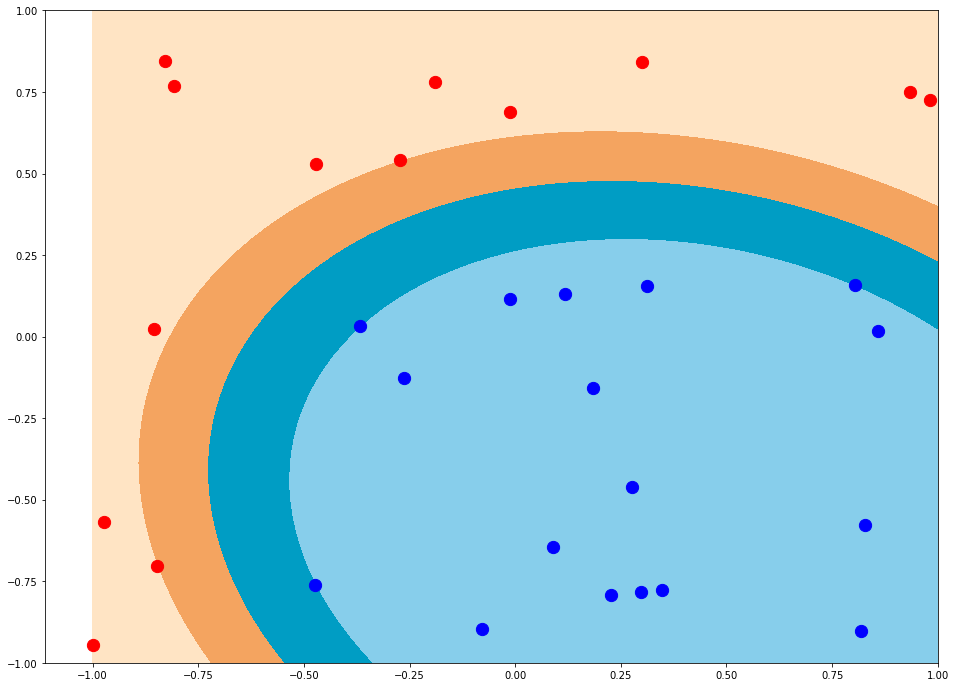

In [8]:
# contour plot
# svm.plot()

resolution = 50
dx = np.linspace(-1, 1, resolution)
dy = np.linspace(-1, 1, resolution)
dx, dy = np.meshgrid(dx, dy)
grid_x = np.c_[dx.flatten(), dy.flatten()]
grid_x_mapping = PolynomialFeatures(degree=2).fit(grid_x).transform(grid_x)
z=np.array([svm.hypothesis(x) for x in grid_x_mapping])
z=z.reshape(dx.shape)
plt.figure(figsize=(16,12))
## fill the area between level curves h(x)=-10000,-1,0,1,10000 with the given color
plt.contourf(dx, dy, z, [-10000,-1,0,1,10000],colors=['skyblue','#009dc4','sandybrown','bisque'])
plt.scatter(X[Y>=0,0],X[Y>=0,1],s=150,color='r')
plt.scatter(X[Y<0,0],X[Y<0,1],s=150,color='b')
plt.show()


## Kernel SVC With Gaussian Kernel

In [9]:
svc = SVC(C=1, kernel='gaussian')
svc.fit(features=X, labels=Y)

# report
print()
print(f'Alpha: {svc.opt_coef.tolist()}')
print(f'Weight: {svc.weight.tolist()}')
print(f'Bias: {svc.bias}')
print(f'SV: {svc.support_vectors}')

     pcost       dcost       gap    pres   dres
 0: -8.1565e+00 -4.7427e+01  4e+01  7e-16  4e-16
 1: -8.9012e+00 -1.2207e+01  3e+00  4e-16  5e-16
 2: -9.9862e+00 -1.0582e+01  6e-01  2e-16  4e-16
 3: -1.0228e+01 -1.0285e+01  6e-02  2e-16  3e-16
 4: -1.0250e+01 -1.0255e+01  6e-03  2e-16  3e-16
 5: -1.0252e+01 -1.0252e+01  2e-04  3e-16  4e-16
 6: -1.0252e+01 -1.0252e+01  1e-05  2e-16  3e-16
 7: -1.0252e+01 -1.0252e+01  1e-06  2e-16  3e-16
Optimal solution found.

Alpha: [0.9985341480465569, 2.539425292332021e-09, 0.9999999925570109, 4.50889119714437e-09, 7.113549925453585e-09, 2.5095054439080623e-09, 0.20797727581170236, 0.38963924317316384, 0.747600802265178, 3.198783008922898e-09, 0.9999999913582163, 2.262244439971335e-09, 0.6706142199605555, 0.9999999946962393, 0.9999999950170612, 3.532986503415548e-09, 0.2601144562817639, 0.9999999917610723, 0.9999999908059022, 0.9999999980315858, 3.7681183118161236e-09, 0.99999995393551, 3.5584409639105692e-09, 0.9999999923113059, 0.9999999844458033,

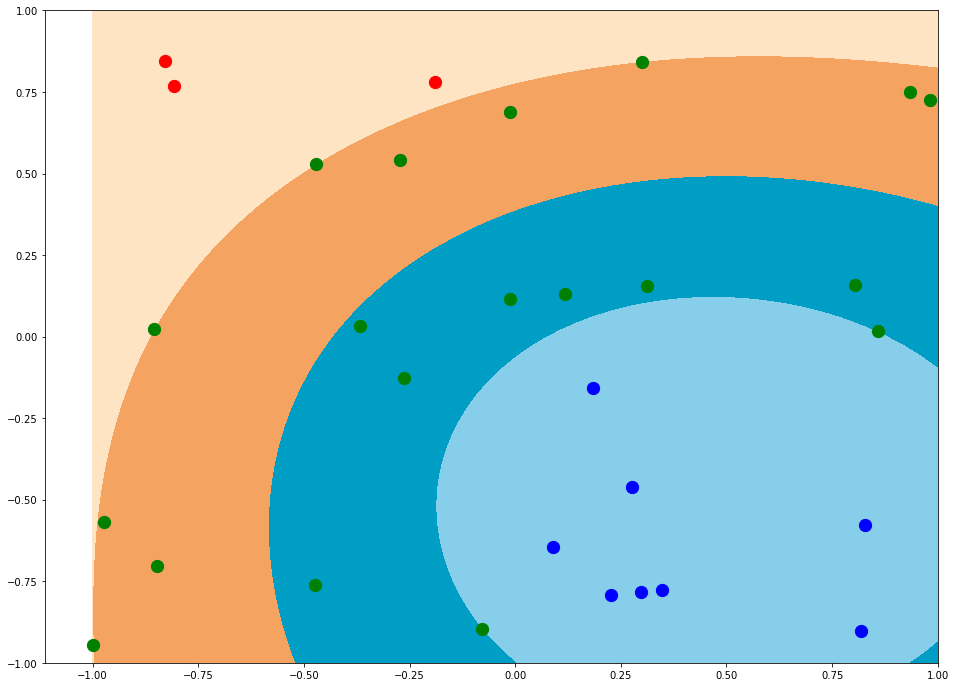

In [10]:
resolution = 50
dx = np.linspace(-1, 1, resolution) 
dy = np.linspace(-1, 1, resolution)
dx, dy = np.meshgrid(dx, dy)
grid_x = np.c_[dx.flatten(), dy.flatten()]
z=np.array([svc.hypothesis(x) for x in grid_x])
z=z.reshape(dx.shape)
plt.figure(figsize=(16,12))
## fill the area between level curves h(x)=-10000,-1,0,1,10000 with the given color
plt.contourf(dx, dy, z, [-10000,-1,0,1,10000],colors=['skyblue','#009dc4','sandybrown','bisque'])
plt.scatter(X[(~svc.sv_indices) & (Y>=0), 0], X[(~svc.sv_indices) & (Y>=0), 1],s=150,color='r')
plt.scatter(X[(~svc.sv_indices) & (Y<0), 0], X[(~svc.sv_indices) & (Y<0), 1],s=150,color='b')
plt.scatter(X[svc.sv_indices, 0],X[svc.sv_indices, 1],s=150,color='g')
plt.show()

In [13]:
svc = SVC(C=100, kernel='gaussian')
svc.fit(features=X, labels=Y)

# report
print()
print(f'Alpha: {svc.opt_coef.tolist()}')
print(f'Weight: {svc.weight.tolist()}')
print(f'Bias: {svc.bias}')
print(f'SV: {svc.support_vectors}')

     pcost       dcost       gap    pres   dres
 0:  1.3782e+04 -7.5623e+04  9e+04  1e-14  3e-14
 1:  3.6992e+03 -6.0639e+03  1e+04  1e-14  2e-14
 2:  5.1377e+02 -8.6256e+02  1e+03  4e-15  1e-14
 3:  4.8982e+01 -1.3421e+02  2e+02  7e-15  5e-15
 4: -9.8717e+00 -3.2369e+01  2e+01  9e-16  2e-15
 5: -2.1728e+01 -2.6856e+01  5e+00  2e-16  1e-15
 6: -2.3937e+01 -2.4159e+01  2e-01  4e-15  2e-15
 7: -2.4072e+01 -2.4080e+01  8e-03  2e-15  2e-15
 8: -2.4078e+01 -2.4078e+01  1e-04  2e-16  2e-15
 9: -2.4078e+01 -2.4078e+01  1e-06  2e-15  2e-15
Optimal solution found.

Alpha: [1.545138454515666e-08, 1.5846477078823569e-09, 0.8067414530095828, 2.7902699474260527e-09, 1.880446572163575e-08, 1.3793660094860501e-09, 9.870707913981511e-10, 2.8846655091400934e-09, 1.329042446173313e-07, 1.8333241233560064e-09, 8.5862670526294e-09, 1.150738688112031e-09, 1.1965236311969483, 12.289071069969912, 1.720374904551794e-08, 8.868971217265768e-09, 9.965792865021392e-09, 1.6923066968347137e-08, 1.9810704102284588e-

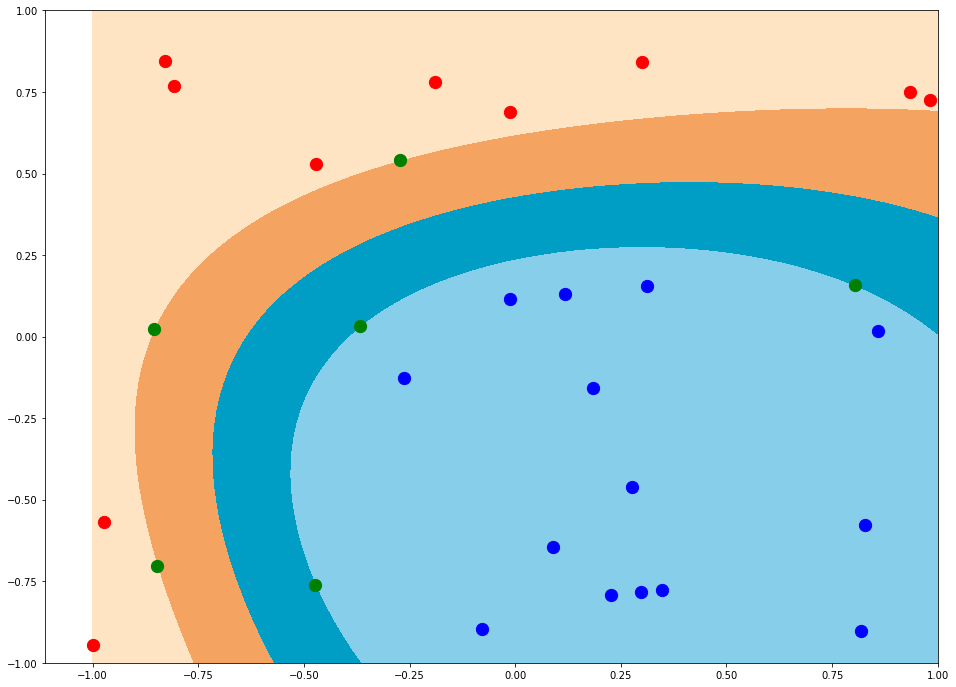

In [14]:
resolution = 50
dx = np.linspace(-1, 1, resolution)
dy = np.linspace(-1, 1, resolution)
dx, dy = np.meshgrid(dx, dy)
grid_x = np.c_[dx.flatten(), dy.flatten()]
z=np.array([svc.hypothesis(x) for x in grid_x])
z=z.reshape(dx.shape)
plt.figure(figsize=(16,12))
## fill the area between level curves h(x)=-10000,-1,0,1,10000 with the given color
plt.contourf(dx, dy, z, [-10000,-1,0,1,10000],colors=['skyblue','#009dc4','sandybrown','bisque'])
plt.scatter(X[(~svc.sv_indices) & (Y>=0), 0], X[(~svc.sv_indices) & (Y>=0), 1],s=150,color='r')
plt.scatter(X[(~svc.sv_indices) & (Y<0), 0], X[(~svc.sv_indices) & (Y<0), 1],s=150,color='b')
plt.scatter(X[svc.sv_indices, 0],X[svc.sv_indices, 1],s=150,color='g')
plt.show()